In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression, RidgeCV
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.regressor.residuals import ResidualsPlot, PredictionError
from yellowbrick.regressor.alphas import AlphaSelection
import pylab 
import scipy.stats as stats
from scipy.stats import norm
from sklearn.neural_network import MLPRegressor


In [33]:
# data = pd.read_csv('data.csv',escapechar="\\")
data = pd.read_csv('week_politics.csv',escapechar="\\")
len(data)

802

Data Cleanup, Outlier Removal, Descriptive Statistics

In [35]:
data.drop_duplicates('title', inplace=True)

In [37]:
data = data[np.abs(data.ups-data.ups.mean())<=(3*data.ups.std())]

In [41]:
data_sub = data[['title', 'ups']]
data_sub.is_copy = False

data_sub['log_ups'] = np.log1p(data_sub['ups'])
#data_sub = data_sub[np.abs((data_sub.ups - data_sub.ups.mean()) <=(2*data_sub.ups.std()))]
train_titles, test_titles, train_labels, test_labels = train_test_split(data_sub.title, 
                                                                        data_sub.log_ups, 
                                                                        test_size=0.20,
                                                                        random_state=42)

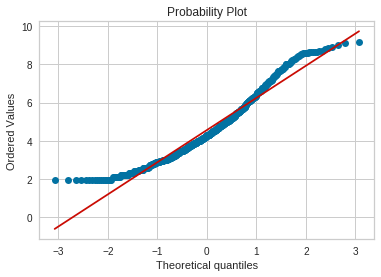

In [43]:
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data_sub['log_ups'], dist="norm", plot=pylab)
pylab.show()

               ups     log_ups
count   653.000000  653.000000
mean    507.094946    4.556634
std    1260.393013    1.722689
min       6.000000    1.945910
25%      24.000000    3.218876
50%      71.000000    4.276666
75%     255.000000    5.545177
max    9489.000000    9.157994

Number of Titles: 	653
Max Length of Title: 	299 characters
Avg Length of Title: 	68 characters
Max words in Title: 	55 words
Avg words in Title: 	10 words


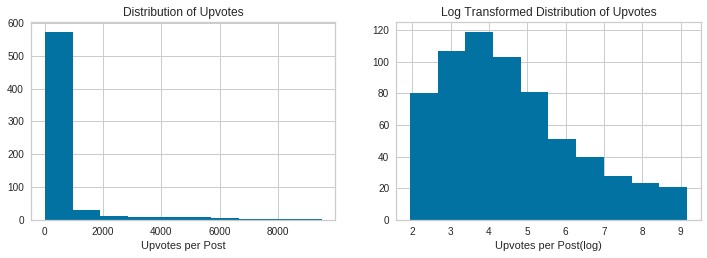

In [44]:
# Stats for Upvotes
print(data_sub.describe())
print()
# Stats for Titles
num_of_titles = len(data_sub['title'])
max_len_title = max([len(x) for x in data_sub['title']])
avg_len_title = int(np.mean([len(x) for x in data_sub['title']]))
max_word_count = max([len(x.split()) for x in data_sub['title']])
avg_word_count = int(np.mean([len(x.split()) for x in data_sub['title']]))

print('Number of Titles: \t{0}'.format(num_of_titles))
print('Max Length of Title: \t{0} characters'.format(max_len_title))
print('Avg Length of Title: \t{0} characters'.format(avg_len_title))
print('Max words in Title: \t{0} words'.format(max_word_count))
print('Avg words in Title: \t{0} words'.format(avg_word_count))

# Distribution of Upvotes
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Distribution of Upvotes')
plt.hist(data_sub['ups'])
plt.xlabel('Upvotes per Post')

plt.subplot(2,2,2)
plt.title('Log Transformed Distribution of Upvotes')
plt.hist(data_sub['log_ups'])
plt.xlabel('Upvotes per Post(log)')
plt.show()


In [45]:
tfidf = TfidfVectorizer(ngram_range=(1,2)).fit(train_titles, train_labels)
train_titles_tfidf = tfidf.transform(train_titles)
test_titles_tfidf = tfidf.transform(test_titles)

In [46]:
reg = Ridge()
reg.fit(train_titles_tfidf, train_labels)
train_predictions = reg.predict(train_titles_tfidf)
test_predictions = reg.predict(test_titles_tfidf)

In [47]:
print('MAE: ', mean_absolute_error(np.expm1(test_predictions), np.expm1(test_labels)))

MAE:  564.966778195


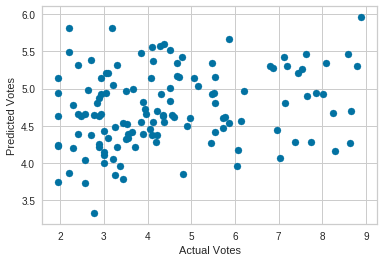

In [48]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
# plt.xscale()
# plt.yscale()
plt.show()

In [49]:
def apply(input):
    tf = tfidf.transform([input])
    prediction = np.expm1(reg.predict(tf).tolist()[0])
    return prediction

In [53]:
index = 20
print('Title: ', test_titles.iloc[index])
print('Actual Score: ', np.expm1(test_labels.iloc[index]))
print('Predicted Score: ', np.expm1(test_predictions[index]))
apply("Donald Trump attacks UN human rights council for including human rights abusers")

Title:  President Trump’s Lawyer Sues BuzzFeed, Fusion GPS Over Russia Dossier
Actual Score:  28.0
Predicted Score:  51.4549003497


57.674944566953229

In [16]:
test_titles.iloc[0]
print(np.expm1(test_labels.iloc[0]))
print(np.expm1(test_predictions[0]))

117.0
22.704366275


In [17]:
# svd = TruncatedSVD()
# lsa = make_pipeline(svd, Normalizer(copy=False))
# X_train_lsa = lsa.fit_transform(train_titles_tfidf)
# X_test_lsa = lsa.transform(test_titles_tfidf)

# reg = Ridge()
# reg.fit(X_train_lsa, train_labels)
# train_predictions = reg.predict(X_train_lsa)
# test_predictions = reg.predict(X_test_lsa)

# print('MAE: ', mean_absolute_error(test_predictions, test_labels))
# print('Mean Train', np.mean(train_labels))
# print('Mean Test', np.mean(test_labels))

# plt.scatter(test_labels, test_predictions)
# plt.show()

In [18]:
# data['created_utc'].head()
# from datetime import datetime, timedelta
# now = datetime.timestamp(datetime.today())
# data['time_elasped'] = (now - data['created_utc'])/86400
# # data['time_elasped'] = data['time_elasped']/86400
# # print(timedelta(seconds=data['time_elasped'][0]).days)
# X_train, X_test, y_train, y_test = train_test_split(data['time_elasped'],
#                                                     data['ups'], test_size=0.20,
#                                                     random_state=42)


In [19]:
# tfidf = TfidfVectorizer(analyzer='word', ngram_range=(0,3), stop_words='english').fit(train_titles, train_labels)
# train_titles_tfidf = tfidf.transform(train_titles)
# test_titles_tfidf = tfidf.transform(test_titles)

# reg = GradientBoostingClassifier()
# reg.fit(train_titles_tfidf, train_labels)
# print(reg.score(test_titles_tfidf, test_labels))
# train_predictions = reg.predict(train_titles_tfidf)
# test_predictions = reg.predict(test_titles_tfidf)
# print(mean_absolute_error(test_predictions, test_labels))

# # print(train_set.iloc[0])
# print(train_predictions[3], train_labels.iloc[3])
# plt.scatter(train_labels, train_predictions)
# plt.show()

In [20]:
# from __future__ import print_function

# from pprint import pprint
# from time import time
# import logging
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('clf', Ridge()),
# ])

# parameters = {
#     #'tfidf__analyzer':('word', 'char'),
#     'tfidf__max_df': (0.5, 0.75, 1.0),
#     #'tfidf__stop_words':('english', 'None'),
#     'tfidf__ngram_range': ((1,1), (1,2),(0,3)),
#     #'tfidf__max_features': (None, 5000, 10000, 50000),
#     #'tfidf__norm': ('l1', 'l2'),
#     #'tfidf__use_idf': (True, False),
#     'clf__alpha': (0.00001, 0.000001),
#     #'clf__fit_intercept': (True, False),
#     #'clf__normalize':(True, False),
#     #'clf__solver':('auto','svd','cholesky','lsqr','sparse_cg','sag','saga'),
# }

# # find the best parameters for both the feature extraction and the
# # classifier
# grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

# print("Performing grid search...")
# print("pipeline:", [name for name, _ in pipeline.steps])
# print("parameters:")
# pprint(parameters)
# t0 = time()
# grid_search.fit(train_titles, train_labels)
# print("done in %0.3fs" % (time() - t0))
# print()

# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))